### The Normal Equation

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
X=2*np.random.rand(100,1)

In [27]:
X[:10]

array([[0.27110584],
       [1.21936011],
       [0.78776243],
       [0.41500613],
       [1.66440542],
       [0.4310033 ],
       [1.45902493],
       [0.80877827],
       [1.93260729],
       [1.79252534]])

In [46]:
y=4+3*X+np.random.randn(100,1)#Gaussian noise

Text(0, 0.5, 'y')

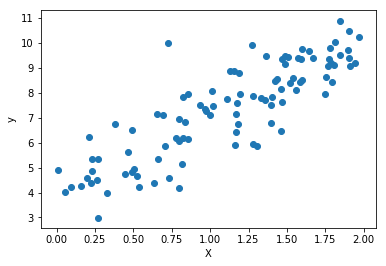

In [47]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')

In [48]:
#Compute parameter using Normal Equation
#add x0=1 tp each instance
X_b=np.c_[np.ones((100,1)),X]

### Normal Equation 
$$ \theta = (X^T X)^{-1}X^T \vec{y} $$

In [49]:
# compute the inverse of a matrix using inv() from np.linalg and dot() for matrix multiplication
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [50]:
theta_best

array([[4.05269678],
       [2.96868951]])

In [73]:
#predict using theta_best
X_new=np.array([[0],[2]])

In [74]:
X_new_b=np.c_[np.ones((2,1)),X_new]

In [75]:
y_predict=X_new_b.dot(theta_best)

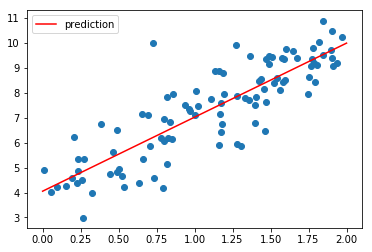

In [80]:
plt.scatter(X,y)
plt.plot(X_new,y_predict,color='r',label='prediction')
plt.legend()
plt.show()

In [88]:
#Use Scikit Learn to compute
#LinearRegression based on scipy.linalg.lstsq() least squares
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.05269678]), array([[2.96868951]]))

In [89]:
lin_reg.predict(X_new)

array([[4.05269678],
       [9.99007579]])

**Computational Complexity**

Computational Complexity of Normal Equation is between 2.4 power of n and 3 power of n ( n is the number of features )

While SVD approach used by Scikit-Learn is about 2 power of n

### Batch Gradient Descent
Gradient vector of the cost function ( missing equation ) 

In [119]:
eta=0.1 #learning rate

In [120]:
n_iterations=1000 
#set large and then early stop when gradient vector become less than tolerance

In [121]:
m=100 #number of observations 

In [122]:
theta=np.random.randn(2,1)

In [123]:
import time
start=time.time()
for i in range(n_iterations):
    gradient=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradient
print(time.time()-start)

0.007736682891845703


In [124]:
theta

array([[4.05269678],
       [2.96868951]])

### Stochastic Gradient Descent

In [131]:
n_epochs=50
t0,t1=5,50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

In [132]:
theta=np.random.randn(2,1)

In [135]:
start=time.time()
for epoch in range(n_epochs):
    for i in range(m):
        randox_index=np.random.randint(m)
        xi=X_b[randox_index:randox_index+1]
        yi=y[randox_index:randox_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients
print(time.time()-start)

3.7732889652252197


In [136]:
theta

array([[4.05801437],
       [2.96994458]])

In [137]:
# Use Stochastic GD with scikit learn
from sklearn.linear_model import SGDRegressor

In [139]:
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,eta0=0.1)

In [143]:
sgd_reg.fit(X,y)

/Users/julie/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDRegressor(eta0=0.1)

In [144]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.06953108]), array([3.02313351]))